In [20]:
from pathlib import Path
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit


import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Create a file path
filepath = "Netflix TV Shows and Movies.csv"

# Read in the data. 
df = pd.read_csv(filepath)

df.head()

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  2998 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 454.1+ KB


In [23]:
# Replacing NaN with unknown to clean df
df['age_certification'].fillna('unknown', inplace=True)

C:\Users\eeliz\AppData\Local\Temp\ipykernel_15532\3621362582.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age_certification'].fillna('unknown', inplace=True)


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  5283 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 454.1+ KB


In [25]:
# Dropping nulls with no imbd votes
filtered_df = df.dropna()

In [26]:
selected_col = ["index", "title", "type", "description", "release_year", "age_certification", "imdb_score", "imdb_votes"]
clean_df = filtered_df[selected_col].copy()

In [27]:
clean_df.head()

,index,title,type,description,release_year,age_certification,imdb_score,imdb_votes
0,0,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,8.3,795222.0
1,1,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,8.2,530877.0
2,2,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,8.0,392419.0
3,3,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,8.1,391942.0
4,4,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,8.8,72895.0


the r^2 is : 0.03608373919726185


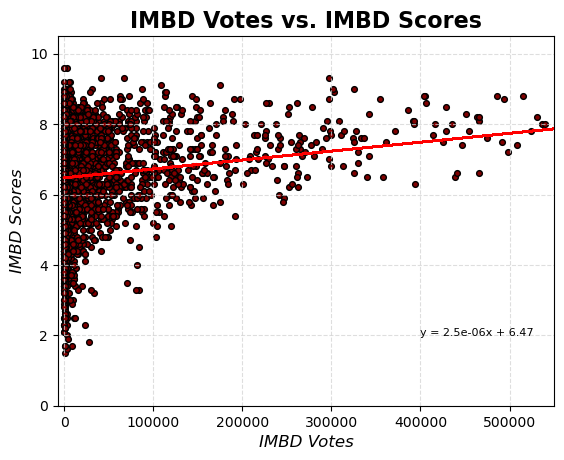

In [32]:
# How do the IMDB scores correlate with IMDB votes?
imbd_votes = clean_df.iloc[:,7]
imbd_score = clean_df.iloc[:,6]

# x_values = imbd_votes
# y_values = imbd_score

# makes best fit line
(slope, intercept, rvalue, pvalue, stderr) = linregress(imbd_votes, imbd_score)
regress_values = imbd_votes * slope + intercept
line_eq = "y = "+str(round(slope,7)) + "x + " +str(round(intercept,2))

plt.scatter(imbd_votes, imbd_score, facecolor="maroon", edgecolor="black", s=17)
plt.plot(imbd_votes, regress_values, "r-")

# Step 4: Customizations
plt.xlabel("IMBD Votes", fontsize=12, fontstyle="italic")
plt.ylabel("IMBD Scores", fontsize=12, fontstyle="italic")
plt.title("IMBD Votes vs. IMBD Scores", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.75)
plt.xlim(-7000, 550000)
plt.ylim(0, 10.5)
plt.annotate(line_eq,(400000,2), fontsize = 8, color='black')

print(f'the r^2 is : {rvalue**2}')
plt.show()